# ***Data Preprocessing***

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Sentiment Analysis for Movie Review/moviereviews.tsv', sep='\t')

In [3]:
dataset.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
len(dataset)

2000

In [5]:
dataset.isna().sum()

,0
label,0
review,35


In [6]:
dataset.dropna(inplace = True)

In [7]:
dataset.isna().sum()

,0
label,0
review,0


In [8]:
mystring = 'Hello World'
mystring.isspace()

False

In [9]:
blanks = []

# (index, label, review text)
for i, lb, rv in dataset.itertuples():
  if rv.isspace():
    blanks.append(i)

In [10]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [11]:
dataset.drop(blanks, inplace=True)

In [12]:
len(dataset)

1938

# ***Building the Model***

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = dataset['review']
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [16]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC())])

In [17]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8487972508591065

In [18]:
y_preds = clf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



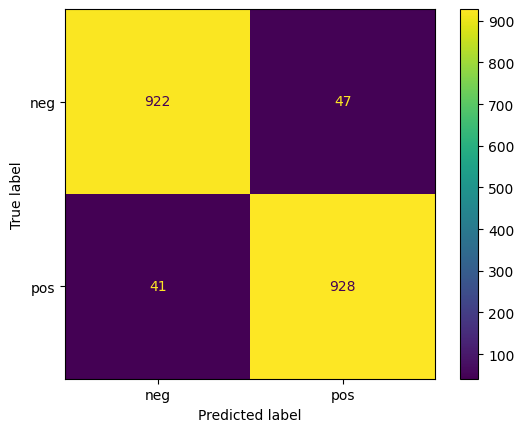

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

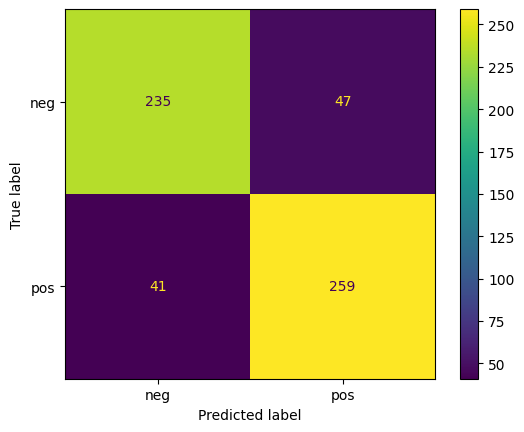

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [22]:
clf.predict(["I recently purchased the new smartphone, and I'm absolutely thrilled with it! The performance is top-notch, with lightning-fast processing speeds and an incredible camera that takes stunning photos. The battery life is amazing, lasting all day even with heavy use. The sleek design and vibrant display make it a joy to use every day. I'm so glad I made this purchase, and I would highly recommend it to anyone looking for a high-quality, reliable device!"])

array(['pos'], dtype=object)

In [41]:
clf.predict(["I had high hopes for this laptop, but it has been a huge disappointment. It runs slowly even with minimal applications open, and the battery barely lasts a few hours, which is incredibly frustrating. The screen quality is subpar, and the keyboard feels cheap and unresponsive. I've also had several issues with it overheating. Overall, I regret buying this laptop and would not recommend it to others."])

array(['pos'], dtype=object)

In [38]:
clf.predict(["'The Forgotten Tale' had the potential to be a standout film, thanks to a talented cast who brought their A-game to the screen. Actors, in particular, delivers a standout performance as the lead character, and the supporting actors also shine, bringing depth and authenticity to their roles. However, despite their best efforts, the movie falls flat due to a weak narrative and uninspired direction. The story feels disjointed and lacks coherence, struggling to maintain a clear direction with plot twists that come off as contrived. The pacing is uneven, leaving key moments rushed or underdeveloped. The direction also fails to build the emotional intensity needed, with inconsistent visual style and tone. Despite the strong performances, the film is ultimately let down by its poor storytelling and direction, making it a disappointing watch."])

array(['neg'], dtype=object)

In [40]:
clf.predict(["'The Forgotten Tale' is a perplexing film where the exceptional talent of the cast is overshadowed by an incoherent narrative and erratic direction. While Actors and the supporting ensemble offer commendable performances, their efforts are entangled in a disjointed plot that meanders without clear purpose. The screenplay seems to chase fleeting ideas, resulting in a story that lacks cohesion and direction. The pacing is uneven, with key scenes feeling both rushed and inexplicably drawn-out. Additionally, the direction suffers from a bewildering inconsistency in tone and visual style, making it challenging to follow the emotional trajectory intended. Despite the actors' clear dedication, the film's muddled execution leaves it struggling to make an impact, rendering it an ultimately unsatisfying experience."])

array(['neg'], dtype=object)

# ***Using NLTK VADER***

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
sid = SentimentIntensityAnalyzer()

In [29]:
dataset['score'] = dataset['review'].apply(lambda review: sid.polarity_scores(review))

In [30]:
dataset.head()

,label,review,score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co..."


In [31]:
dataset['compound'] = dataset['score'].apply(lambda d:d['compound'])

In [32]:
dataset.head()

,label,review,score,compound
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


In [33]:
dataset['comp_score'] = dataset['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [34]:
dataset.head()

,label,review,score,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


In [35]:
print(classification_report(dataset['label'], dataset['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [36]:
accuracy_score(dataset['label'], dataset['comp_score'])

0.6357069143446853

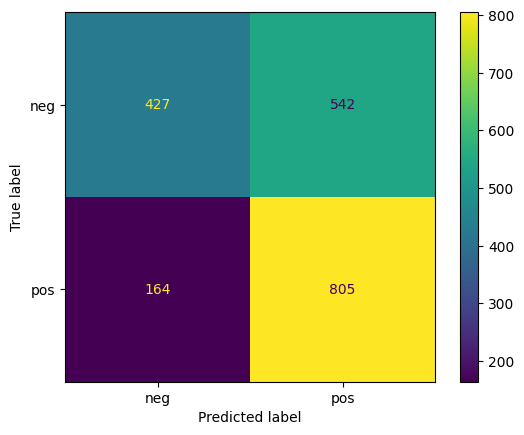

In [37]:
ConfusionMatrixDisplay.from_predictions(dataset['label'], dataset['comp_score']);

In [43]:
sid.polarity_scores("I had high hopes for this laptop, but it has been a huge disappointment. It runs slowly even with minimal applications open, and the battery barely lasts a few hours, which is incredibly frustrating. The screen quality is subpar, and the keyboard feels cheap and unresponsive. I've also had several issues with it overheating. Overall, I regret buying this laptop and would not recommend it to others.")

{'neg': 0.196, 'neu': 0.741, 'pos': 0.063, 'compound': -0.9053}